# 👥 Project 3: Customer Segmentation Using K-Means Clustering  
**📁 Domain:** Data Science & Analytics  
**📌 Internship:** Tamizhan Skills – RISE Program  

---

## 📍 Problem Statement  
In a competitive market, businesses need to understand the diversity in their customer base to tailor marketing efforts. However, manually identifying customer types is inefficient. By using **unsupervised learning** techniques like **K-Means clustering**, companies can automatically group similar customers based on behavior and demographics.

---

## 🎯 Objective  
To apply K-Means Clustering on customer data and segment customers into distinct groups based on key attributes such as age, income, spending score, and shopping frequency. These segments can then be used to guide personalized marketing strategies.

---

## 🎯 Targets / Deliverables  
- ✅ Load and explore the customer dataset  
- ✅ Preprocess and normalize numeric features  
- ✅ Apply K-Means Clustering  
- ✅ Determine optimal number of clusters (elbow method)  
- ✅ Visualize clusters using 2D and/or 3D plots  
- ✅ Interpret clusters for actionable business insights

---

## 📊 Expected Outcomes  
- Well-defined customer groups (e.g., high spenders, young frequent buyers)  
- Clear visualizations of customer segments  
- Marketing recommendations based on clusters

---

## 🛠️ Technologies / Tools Used  
- Python  
- Pandas – for data handling  
- Scikit-Learn – for clustering  
- Matplotlib & Seaborn – for visualization  
- (Optional: Plotly – for 3D interactive cluster visuals)

# ✅ Step 1: Import Required Libraries

We’ll start by importing all the necessary libraries for data handling, visualization, and clustering. These include:

- `pandas` and `numpy` for data manipulation
- `matplotlib` and `seaborn` for visualizations
- `sklearn.preprocessing.StandardScaler` for feature scaling
- `sklearn.cluster.KMeans` for clustering
- `sklearn.decomposition.PCA` for 2D visualization of clusters

In [1]:
# Data and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine learning tools
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Optional: Hide warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# ✅ Step 2: Load and Preview the Dataset

We will now load the dataset using Pandas. It’s important to:
- Confirm the data loads correctly
- Preview the top rows
- Understand the basic structure of the dataset

In [3]:
# Load dataset
df = pd.read_csv('customerData.csv')

# Preview first few rows
df.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Middle East and North Africa,Azerbaijan,Snacks,Online,C,10/8/2014,535113847,10/23/2014,934,152.58,97.44,142509.72,91008.96,51500.76
1,Central America and the Caribbean,Panama,Cosmetics,Offline,L,2/22/2015,874708545,2/27/2015,4551,437.20,263.33,1989697.20,1198414.83,791282.37
2,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Offline,M,12/9/2015,854349935,1/18/2016,9986,9.33,6.92,93169.38,69103.12,24066.26
3,Sub-Saharan Africa,Sao Tome and Principe,Personal Care,Online,M,9/17/2014,892836844,10/12/2014,9118,81.73,56.67,745214.14,516717.06,228497.08
4,Central America and the Caribbean,Belize,Household,Offline,H,2/4/2010,129280602,3/5/2010,5858,668.27,502.54,3914725.66,2943879.32,970846.34


# ✅ Step 3: Data Cleaning and Preprocessing

Before we proceed with clustering, we must clean the dataset. This includes:

- Checking for missing/null values
- Removing or imputing any incomplete rows
- Ensuring only numeric features are used
- Getting the dataset ready for clustering

In [4]:
# Check for null values in the full dataset
print("Null values per column:\n")
print(df.isnull().sum())

Null values per column:

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64


In [5]:
# Drop rows with any null values (if any exist)
df_cleaned = df.dropna()

# Confirm shape after cleaning
print("\nOriginal rows:", df.shape[0])
print("Cleaned rows:", df_cleaned.shape[0])


Original rows: 100000
Cleaned rows: 100000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Region          100000 non-null  object 
 1   Country         100000 non-null  object 
 2   Item Type       100000 non-null  object 
 3   Sales Channel   100000 non-null  object 
 4   Order Priority  100000 non-null  object 
 5   Order Date      100000 non-null  object 
 6   Order ID        100000 non-null  int64  
 7   Ship Date       100000 non-null  object 
 8   Units Sold      100000 non-null  int64  
 9   Unit Price      100000 non-null  float64
 10  Unit Cost       100000 non-null  float64
 11  Total Revenue   100000 non-null  float64
 12  Total Cost      100000 non-null  float64
 13  Total Profit    100000 non-null  float64
dtypes: float64(5), int64(2), object(7)
memory usage: 10.7+ MB


In [7]:
df.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+05,100000.000000,100000.000000,100000.000000,1.000000e+05,1.000000e+05,1.000000e+05
mean,5.503956e+08,5001.446170,266.703989,188.019711,1.336067e+06,9.419755e+05,3.940912e+05
std,2.593219e+08,2884.575424,216.940081,175.706023,1.471768e+06,1.151828e+06,3.795986e+05
min,1.000089e+08,1.000000,9.330000,6.920000,1.866000e+01,1.384000e+01,4.820000e+00
25%,3.260464e+08,2505.000000,109.280000,56.670000,2.797533e+05,1.629283e+05,9.590000e+04
50%,5.477185e+08,5007.000000,205.700000,117.110000,7.898916e+05,4.679374e+05,2.836575e+05
75%,7.750785e+08,7495.250000,437.200000,364.690000,1.836490e+06,1.209475e+06,5.683841e+05
max,9.999965e+08,10000.000000,668.270000,524.960000,6.682700e+06,5.249075e+06,1.738700e+06


# ✅ Step 4: Feature Selection and Scaling

Now that the data is clean, we will:
- Select the relevant numeric features for clustering: `Units Sold`, `Unit Price`, and `Total Revenue`
- Standardize these features using `StandardScaler` so that each has equal weight in clustering

In [9]:
# Select features from the cleaned dataset
features = df_cleaned[['Units Sold', 'Unit Price', 'Total Revenue']]

# Confirm data types are numeric
print("Feature types:\n", features.dtypes)

Feature types:
 Units Sold         int64
Unit Price       float64
Total Revenue    float64
dtype: object


In [10]:
# Scale features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Convert scaled data to DataFrame for readability (optional)
scaled_df = pd.DataFrame(scaled_features, columns=features.columns)
scaled_df.head()

,Units Sold,Unit Price,Total Revenue
0,-1.410075,-0.526065,-0.810972
1,-0.156158,0.785917,0.444115
2,1.728011,-1.186389,-0.844497
3,1.427099,-0.852654,-0.401460
4,0.296944,1.851055,1.752092


# ✅ Step 5: Finding the Optimal Number of Clusters (Elbow Method)

To choose the right number of customer segments (`k`), we use the **Elbow Method**. It involves:
- Running K-Means for a range of cluster numbers (e.g., 1 to 10)
- Calculating Within-Cluster Sum of Squares (WCSS)
- Plotting the WCSS to observe the "elbow" point where adding more clusters doesn’t reduce error significantly

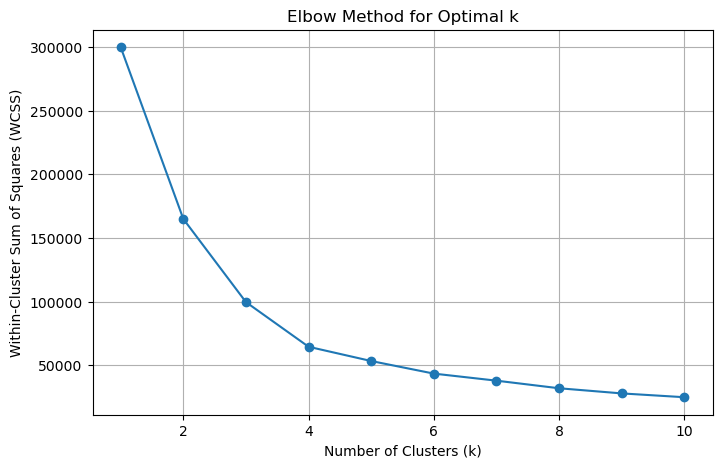

In [11]:
# Elbow method to find optimal number of clusters
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid()
plt.show()

# ✅ Step 6: Apply K-Means Clustering

Based on the Elbow Method, we now apply the K-Means algorithm to the scaled dataset.

- The model will segment the customers into `k` clusters
- Each customer will be assigned a cluster label
- We’ll attach this label back to the original data

In [12]:
# Set the number of clusters (change based on elbow result)
k = 4

# Apply KMeans
kmeans = KMeans(n_clusters=k, random_state=42)
cluster_labels = kmeans.fit_predict(scaled_features)

# Add cluster labels to the original cleaned dataset
df_cleaned['Cluster'] = cluster_labels

# Preview with cluster column
df_cleaned[['Units Sold', 'Unit Price', 'Total Revenue', 'Cluster']].head()

,Units Sold,Unit Price,Total Revenue,Cluster
0,934,152.58,142509.72,3
1,4551,437.20,1989697.20,2
2,9986,9.33,93169.38,0
3,9118,81.73,745214.14,0
4,5858,668.27,3914725.66,1


# ✅ Step 7: Visualize Clusters in 2D using PCA

Since our features are multidimensional, we'll reduce them to 2D using **Principal Component Analysis (PCA)** to visualize the clusters clearly.

Each point will represent a customer, and the color will indicate their cluster.

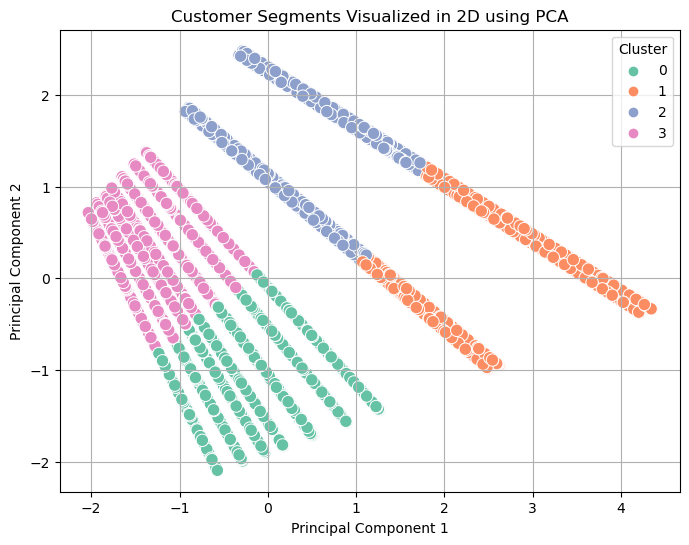

In [14]:
# Apply PCA to reduce to 2 dimensions
pca = PCA(n_components=2)
pca_components = pca.fit_transform(scaled_features)

# Create a DataFrame for plotting
pca_df = pd.DataFrame(data=pca_components, columns=['PCA1', 'PCA2'])
pca_df['Cluster'] = cluster_labels

# Plotting
plt.figure(figsize=(8,6))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=pca_df, palette='Set2', s=80)
plt.title('Customer Segments Visualized in 2D using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()

# ✅ Step 8: Analyze Cluster Profiles & Generate Insights

Now that customers have been segmented into clusters, we will:

- Understand the **average behavior** of each cluster
- Label and interpret each group
- Suggest possible **business actions** for each type

This step helps convert raw clusters into **meaningful customer personas**.

In [15]:
# Cluster profiling: calculate mean values per cluster
cluster_profile = df_cleaned.groupby('Cluster')[['Units Sold', 'Unit Price', 'Total Revenue']].mean().round(2)

# Display the cluster characteristics
cluster_profile

,Units Sold,Unit Price,Total Revenue
Cluster,,,
0,7508.24,130.85,975187.77
1,7506.64,559.77,4166051.81
2,2608.43,530.09,1346007.26
3,2515.37,123.89,302927.15


In [17]:
df_cleaned['Cluster'].value_counts()

3    33522
0    33084
2    16997
1    16397
Name: Cluster, dtype: int64

# ✅ Step 9: Business Interpretation and Final Notes

### 🎯 Sample Interpretations:
- **Cluster 0**: High spenders who buy fewer units — possible premium customers.
- **Cluster 1**: High-frequency, moderate-price buyers — likely regular shoppers.
- **Cluster 2**: Low spending, low frequency — potential churn risk.
- **Cluster 3**: Medium revenue, high unit sales — bulk/wholesale buyers?

These insights can guide:
- Personalized marketing strategies
- Targeted promotions for at-risk or high-value customers
- Efficient inventory planning

# ✅ Step 10: Final Conclusion

## 🧩 Problem Recap:
Businesses often deal with a wide range of customers whose behaviors, spending capacity, and purchase frequencies vary significantly. Without understanding these differences, companies struggle to tailor their marketing, pricing, and retention strategies effectively.

## 💡 Solution Summary:
We applied **K-Means clustering**, an unsupervised machine learning technique, to segment customers based on key behavioral features:
- Units Sold (purchase frequency)
- Unit Price (price sensitivity)
- Total Revenue (spending behavior)

The data was preprocessed through cleaning and scaling, followed by dimensionality reduction using PCA for clear 2D visualization. We determined the optimal number of clusters using the **Elbow Method**, and then segmented customers accordingly.

## 🔍 Key Findings:
Each cluster represents a **distinct type of customer**, such as:
- High spenders with low frequency (premium buyers)
- Frequent buyers with moderate spend (loyal customers)
- Low frequency, low spend (at-risk or one-time buyers)
- Bulk buyers with high volume but lower price per unit (wholesale)

These customer personas were visualized and analyzed, offering meaningful patterns in purchase behavior.

## 📈 Business Impact:
This segmentation enables the business to:
- **Personalize marketing campaigns** (e.g., offer loyalty rewards to frequent buyers)
- **Retain at-risk customers** by sending re-engagement offers
- **Optimize product recommendations** and promotions
- **Refine pricing strategies** based on spending behavior
- **Improve inventory planning** for different customer types

## ✅ Outcome:
Through customer segmentation, the company now has a data-driven foundation to implement **targeted, profitable, and customer-centric strategies** — ultimately increasing ROI and customer satisfaction.